In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import pandas
data2011 = pandas.read_csv('showcases.2011.csv', header=None).T
data2011 = data2011.tail(-1).loc[:, [3, 4, 6, 7, 9, 10]]
data2011.columns = ['price1', 'price2', 'bid1', 'bid2', 'diff1', 'diff2']
data2012 = pandas.read_csv('showcases.2012.csv', header=None).T
data2012 = data2012.tail(-1).loc[:, [2, 3, 5, 6, 8, 9]]
data2012.columns = ['price1', 'price2', 'bid1', 'bid2', 'diff1', 'diff2']
data = pandas.concat([data2011, data2012])
data.reset_index(drop=True, inplace=True)
data = data.convert_objects(convert_numeric=True)

In [3]:
import thinkbayes
import thinkplot
import numpy

In [4]:
def kde(values, name=''):
    pdf = thinkbayes.EstimatedPdf(values)
    xs = numpy.linspace(numpy.min(values), numpy.max(values))
    return pdf.MakePmf(xs, name=name)

pmf1 = kde(data.loc[:, 'price1'], name='price1')
pmf2 = kde(data.loc[:, 'price2'], name='price2')

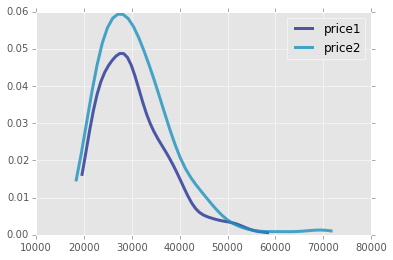

In [5]:
thinkplot.PrePlot(2)
thinkplot.Pmf(pmf1)
thinkplot.Pmf(pmf2)
plt.legend(loc='best')

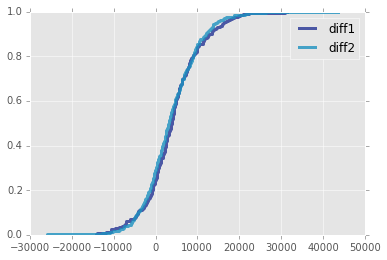

In [11]:
thinkplot.PrePlot(2)
thinkplot.Cdf(thinkbayes.MakeCdfFromList(data.loc[:, 'diff1'], name='diff1'))
thinkplot.Cdf(thinkbayes.MakeCdfFromList(data.loc[:, 'diff2'], name='diff2'))
plt.legend(loc='best')